<h1 style='color:black;background:yellow;font-weigth:bolder;font-size:32px;text-align:center;'>E-commerce EDA</h1>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

<h3 style='color:black;background:yellow;font-weigth:bolder;font-size:24px;text-align:center;'>Getting basic Information of the shape and nature of the data</h3>

In [5]:
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [6]:
products.info()
print()
products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB



,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [7]:
transactions.info()
print()
transactions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB



,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [8]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [9]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [10]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [11]:
customers[customers.duplicated()]

,CustomerID,CustomerName,Region,SignupDate


In [12]:
transactions[transactions.duplicated()]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price


In [13]:
products[products.duplicated()]

,ProductID,ProductName,Category,Price


<h1 style='color:black;background:yellow;font-weigth:bolder;font-size:24px;text-align:center;'>Converting Datetime to supported format</h1>

In [14]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [15]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate']);
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Merging Transaction and Customers

In [16]:
transaction_customers = pd.merge(transactions , customers , on='CustomerID',how='inner')
transaction_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 85.9+ KB


In [17]:
transaction_customers.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [18]:
transaction_customers.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04


### Merging Products With The Transaction & Customers

In [19]:
product_bought = pd.merge(transaction_customers  , products , on="ProductID" , how="inner")
product_bought.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 109.4+ KB


In [20]:
product_bought.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [21]:
product_bought.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [22]:
product_bought.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [23]:
product_bought.to_csv("FinalData.csv",index=False)

In [24]:
product_bought['Year_Month'] = pd.to_datetime(product_bought['TransactionDate']).dt.to_period('M')

In [25]:
product_bought.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,Year_Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03


In [26]:
revenue_trends = product_bought.groupby('Year_Month')['TotalValue'].sum().reset_index()

In [27]:
revenue_trends['Year_Month'] = revenue_trends['Year_Month'].dt.to_timestamp()

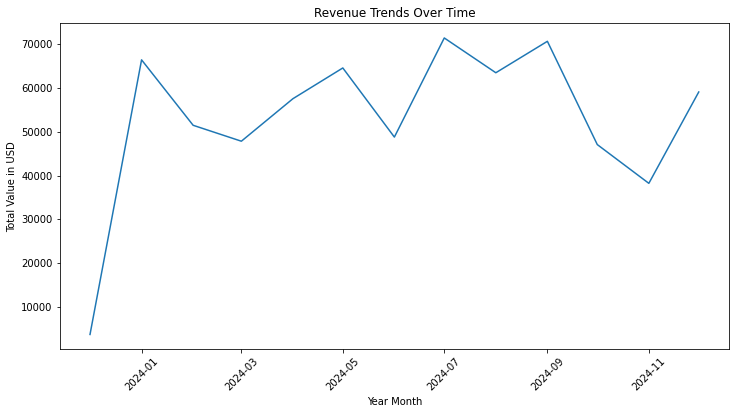

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_trends, x="Year_Month", y='TotalValue')
plt.title("Revenue Trends Over Time")
plt.xlabel("Year Month")
plt.ylabel("Total Value in USD")
plt.xticks(rotation=45)
plt.show()

In [29]:
average_order_value = product_bought['TotalValue'].mean()
f'{average_order_value:.2f}'

'690.00'

<h1 style='color:white;background:purple;font-weigth:bolder;font-size:32px;text-align:center;'>Business Insights</h1>

<h1 style='color:black;background:#ceddbb;font-weigth:bolder;font-size:24px;text-align:center;'>Top Customer(Revenue)</h1>

In [30]:
n = 10 
top_customers = product_bought.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(n)
top_customers

CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64

<h1 style='color:black;background:#ceddbb;font-weigth:bolder;font-size:24px;text-align:center;'>Best Selling Products</h1>

In [31]:
best_selling_products = product_bought.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
best_selling_products

ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64

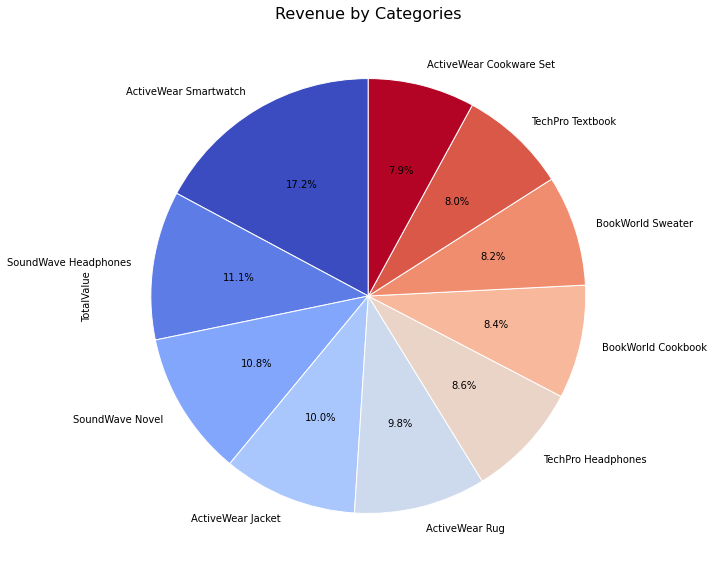

In [40]:
plt.figure(figsize=(10,10))
best_selling_products.plot(kind='pie' , autopct='%1.1f%%' , startangle=90 , colormap='coolwarm' , textprops={'fontsize':10} , wedgeprops={'edgecolor' : '#fff'})
plt.title('Revenue by Categories' , fontsize=16)
plt.show()

<h1 style='color:black;background:#ceddbb;font-weigth:bolder;font-size:24px;text-align:center;'>Most Selling Categories</h1>

In [33]:
categories = product_bought.Category.unique()
category_revenue = product_bought.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.head()

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

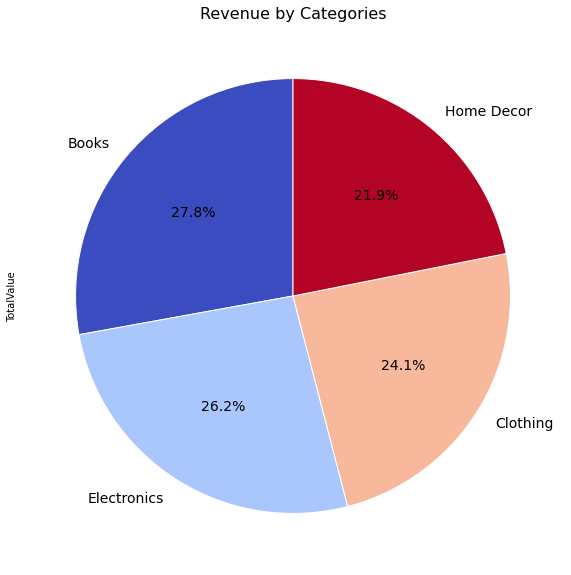

In [34]:
plt.figure(figsize=(10,10))
category_revenue.plot(kind='pie' , autopct='%1.1f%%' , startangle=90 , colormap='coolwarm' , textprops={'fontsize':14} , wedgeprops={'edgecolor' : '#fff'})
plt.title('Revenue by Categories' , fontsize=16)
plt.show()

<h1 style='color:black;background:#ceddbb;font-weigth:bolder;font-size:24px;text-align:center;'>Frequent Customers</h1>

In [35]:
customer_frequency = product_bought.groupby('CustomerID')['TransactionDate'].nunique()
customer_frequency.describe()

count    199.000000
mean       5.025126
std        2.198340
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       11.000000
Name: TransactionDate, dtype: float64

In [36]:
customer_frequency.head()

CustomerID
C0001    5
C0002    4
C0003    4
C0004    8
C0005    3
Name: TransactionDate, dtype: int64

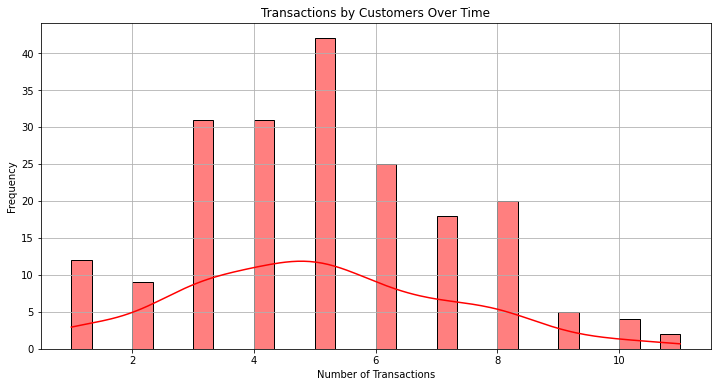

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(customer_frequency , kde =  True , bins=30 , color = 'red')
plt.title('Transactions by Customers Over Time')
plt.xlabel("Number of Transactions")
plt.ylabel("Frequency")
plt.grid()
plt.show()

<h1 style='color:black;background:#ceddbb;font-weigth:bolder;font-size:24px;text-align:center;'>Sales during Particular Time (Season)</h1>

In [38]:
product_bought['Month'] = product_bought['TransactionDate'].dt.month
monthly_revenue = product_bought.groupby('Month')['TotalValue'].sum()

/tmp/ipykernel_33000/4099009645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index , y = monthly_revenue.values , palette='husl')


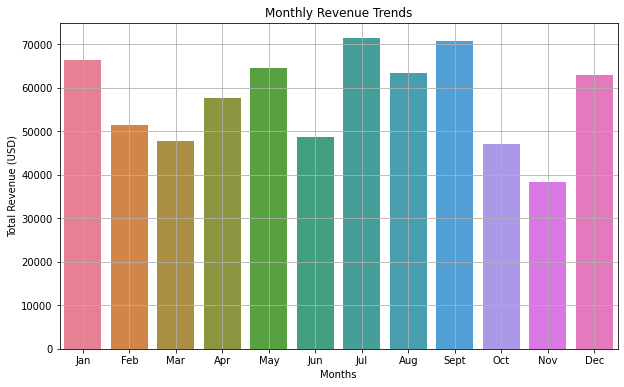

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_revenue.index , y = monthly_revenue.values , palette='husl')
plt.title('Monthly Revenue Trends')
plt.xlabel('Months')
plt.ylabel('Total Revenue (USD)')
plt.xticks(range(12) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May'  , 'Jun' ,'Jul' , 'Aug' , 'Sept' , 'Oct' , 'Nov' , 'Dec'])
plt.grid()
plt.show()